In [2]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


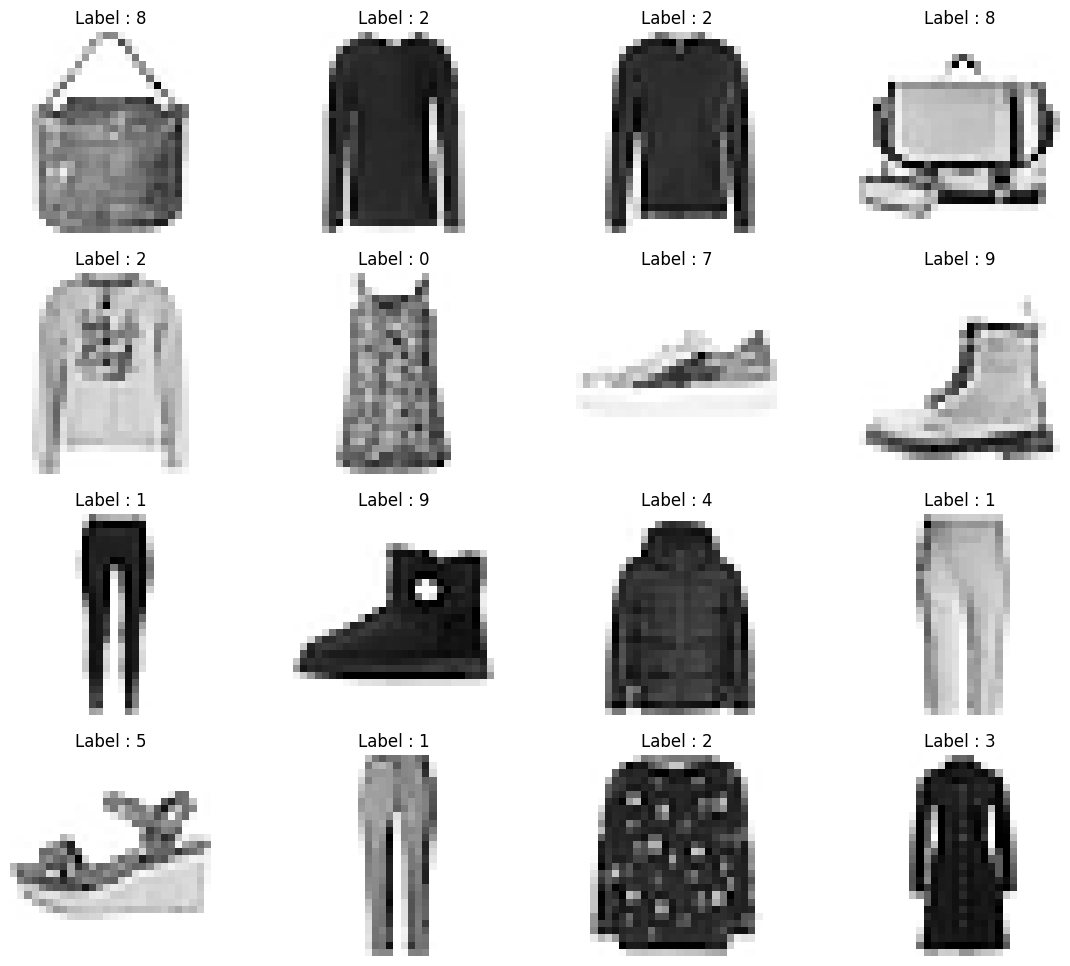

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

samples = random.choices(population=range(0,len(y_train)), k=16)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
  plt.subplot(4, 4, idx+1)
  plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
  plt.title('Label : ' + str(y_train[n]) )
  plt.axis('off')

plt.show()

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [7]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                 epochs=10, batch_size=100, verbose=1)
print('Fit time : ', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 21s 32ms/step - loss: 0.4822 - accuracy: 0.8272 - val_loss: 0.4298 - val_accuracy: 0.8431
Epoch 2/10
600/600 [==============================] - 17s 29ms/step - loss: 0.3580 - accuracy: 0.8700 - val_loss: 0.3952 - val_accuracy: 0.8596
Epoch 3/10
600/600 [==============================] - 17s 28ms/step - loss: 0.3227 - accuracy: 0.8811 - val_loss: 0.3604 - val_accuracy: 0.8729
Epoch 4/10
600/600 [==============================] - 19s 32ms/step - loss: 0.2983 - accuracy: 0.8892 - val_loss: 0.3406 - val_accuracy: 0.8774
Epoch 5/10
600/600 [==============================] - 14s 24ms/step - loss: 0.2781 - accuracy: 0.8963 - val_loss: 0.3307 - val_accuracy: 0.8816
Epoch 6/10
600/600 [==============================] - 17s 29ms/step - loss: 0.2639 - accuracy: 0.9024 - val_loss: 0.3306 - val_accuracy: 0.8804
Epoch 7/10
600/600 [==============================] - 20s 34ms/step - loss: 0.2505 - accuracy: 0.9072 - val_loss: 0.3371 - val_accuracy:

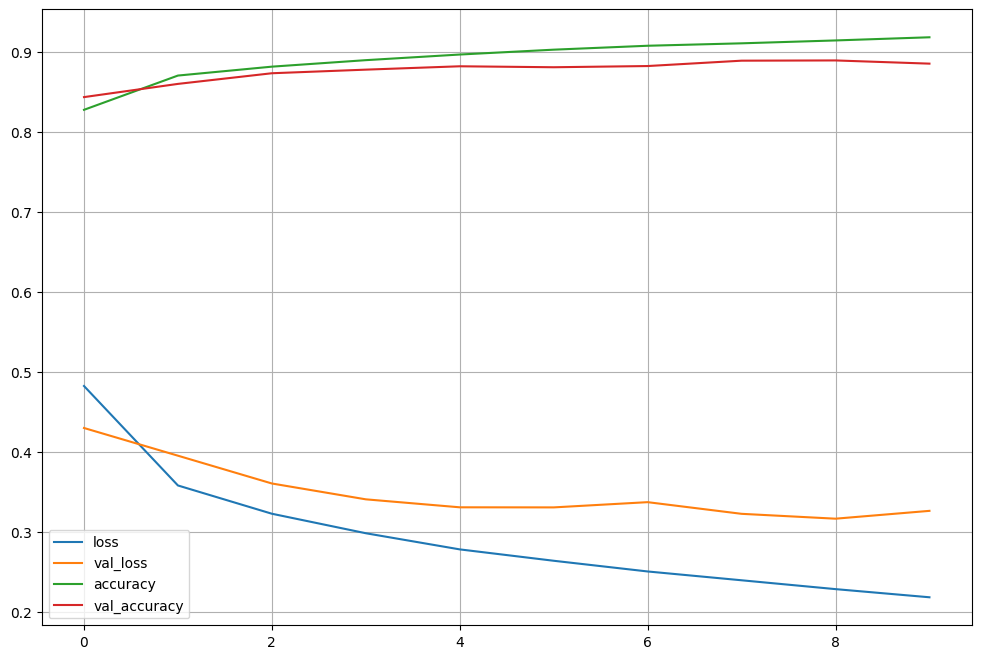

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
  plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [9]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.3262 - accuracy: 0.8849
Test loss : 0.3262437880039215
Test accuracy : 0.8848999738693237


In [11]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 4ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [12]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [13]:
wrong_result = []

for n in range(0, len(y_test)):
  if predicted_labels[n] != y_test[n]:
    wrong_result.append(n)

len(wrong_result)

1151

In [14]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[5006,
 3106,
 6085,
 3540,
 314,
 9961,
 74,
 4213,
 5474,
 5474,
 4847,
 4777,
 1339,
 7855,
 5006,
 5695]

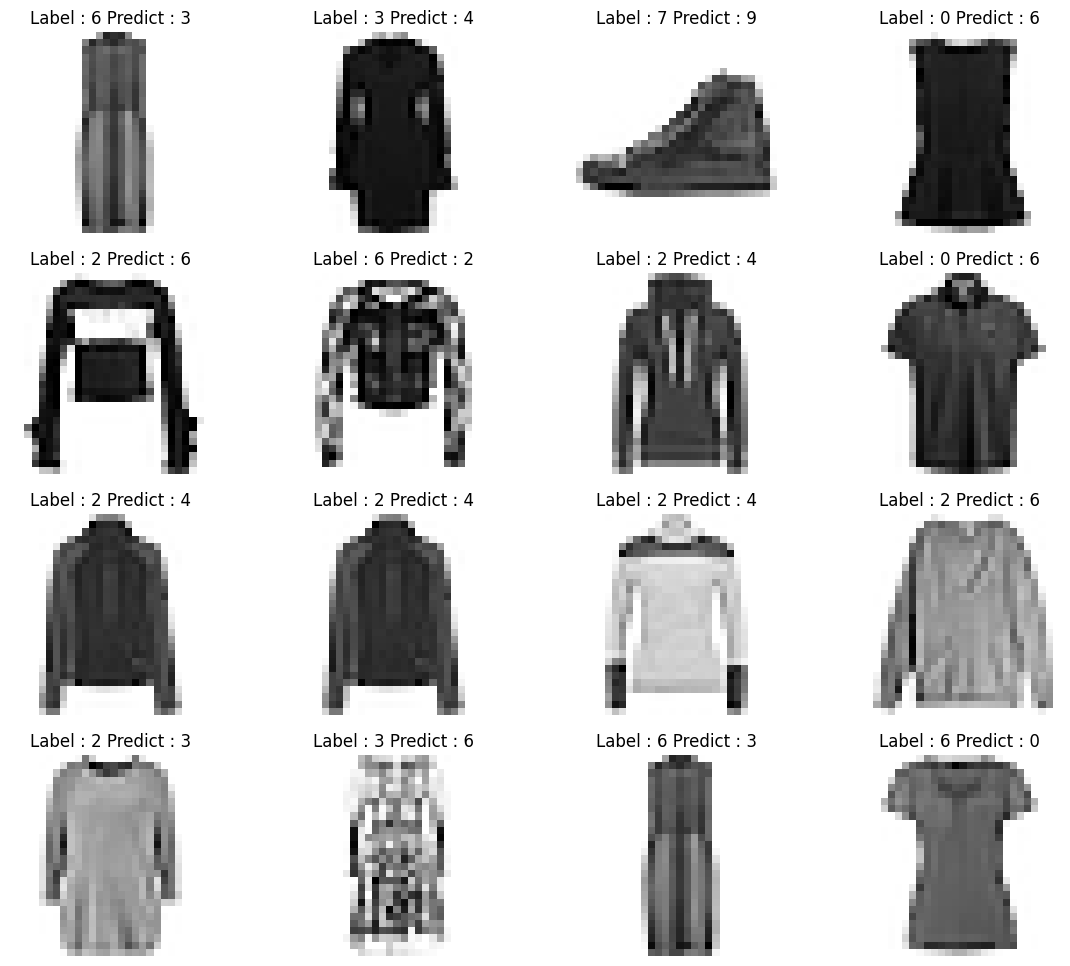

In [15]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
  plt.subplot(4, 4, idx+1)
  plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
  plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
  plt.axis('off')

plt.show()